## **Implement GridSearchCV, Categorical Encoding, and Pipeline**

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

In [29]:
house_data = pd.read_csv('housing-classification-iter3.csv')
house_data

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
0,8450,65.0,856,3,0,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc
1,9600,80.0,1262,3,1,0,2,298,0,0,RL,Feedr,GasA,Pave,Y,CBlock
2,11250,68.0,920,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc
3,9550,60.0,756,3,1,0,3,0,0,0,RL,Norm,GasA,Pave,Y,BrkTil
4,14260,84.0,1145,4,1,0,3,192,0,0,RL,Norm,GasA,Pave,Y,PConc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc
1456,13175,85.0,1542,3,2,0,2,349,0,0,RL,Norm,GasA,Pave,Y,CBlock
1457,9042,66.0,1152,4,2,0,1,0,0,1,RL,Norm,GasA,Pave,Y,Stone
1458,9717,68.0,1078,2,0,0,1,366,0,0,RL,Norm,GasA,Pave,Y,CBlock


In [30]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
 10  MSZoning      1460 non-null   object 
 11  Condition1    1460 non-null   object 
 12  Heating       1460 non-null   object 
 13  Street        1460 non-null   object 
 14  CentralAir    1460 non-null   object 
 15  Foundation    1460 non-null   object 
dtypes: float64(1), int64(9), object(6)
memory usage: 182.6+ KB


In [31]:
house_data.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
Expensive         0
MSZoning          0
Condition1        0
Heating           0
Street            0
CentralAir        0
Foundation        0
dtype: int64

In [32]:
house_data.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

##### **Split Data**

In [33]:
X = house_data.drop('Expensive', axis=1)
y = house_data.Expensive

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=300)

In [34]:
X_train_num = X_train.select_dtypes(include='number')
X_train_num

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
1175,10678,85.0,1683,4,1,0,2,0,0
1107,23257,168.0,868,3,1,0,2,0,0
194,7180,60.0,864,3,0,0,1,0,0
1071,11700,78.0,727,4,0,0,2,0,0
1050,8993,73.0,1302,3,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...
1033,8125,NaN,1654,3,0,0,3,0,0
1002,11957,75.0,1574,3,1,0,3,144,0
917,17140,NaN,1134,3,0,0,1,0,0
481,11846,72.0,1792,2,1,0,3,206,0


In [35]:
X_train_num.isna().sum()

LotArea           0
LotFrontage     185
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
dtype: int64

In [36]:
X_train_num = X_train_num.drop(['PoolArea', 'ScreenPorch'], axis=1)
X_train_num

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF
1175,10678,85.0,1683,4,1,2,0
1107,23257,168.0,868,3,1,2,0
194,7180,60.0,864,3,0,1,0
1071,11700,78.0,727,4,0,2,0
1050,8993,73.0,1302,3,0,2,0
...,...,...,...,...,...,...,...
1033,8125,NaN,1654,3,0,3,0
1002,11957,75.0,1574,3,1,3,144
917,17140,NaN,1134,3,0,1,0
481,11846,72.0,1792,2,1,3,206


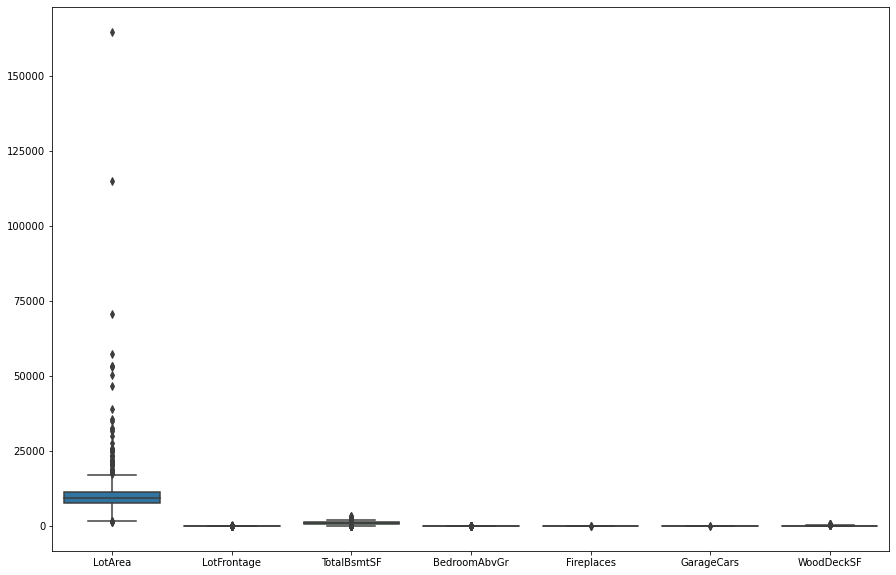

In [37]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=X_train_num)
plt.show()

In [38]:
X_train_cat = X_train.select_dtypes(include='object')
X_train_cat

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
1175,RL,Norm,GasA,Pave,Y,PConc
1107,RL,Norm,GasA,Pave,Y,PConc
194,RL,Norm,GasA,Pave,Y,CBlock
1071,RL,RRAn,GasA,Pave,Y,CBlock
1050,RL,Norm,GasA,Pave,Y,PConc
...,...,...,...,...,...,...
1033,RL,Norm,GasA,Pave,Y,PConc
1002,RL,RRAn,GasA,Pave,Y,PConc
917,RL,Norm,GasA,Pave,Y,CBlock
481,RL,Norm,GasA,Pave,Y,PConc


In [39]:
X_train_cat = X_train_cat.drop(['Heating', 'Street', 'CentralAir'], axis=1)
X_train_cat

,MSZoning,Condition1,Foundation
1175,RL,Norm,PConc
1107,RL,Norm,PConc
194,RL,Norm,CBlock
1071,RL,RRAn,CBlock
1050,RL,Norm,PConc
...,...,...,...
1033,RL,Norm,PConc
1002,RL,RRAn,PConc
917,RL,Norm,CBlock
481,RL,Norm,PConc


In [40]:
X_train_cat.MSZoning.value_counts()

RL         804
RM         149
FV          48
RH          13
C (all)      8
Name: MSZoning, dtype: int64

In [41]:
X_train_cat.Condition1.value_counts()

Norm      888
Feedr      59
Artery     28
RRAn       19
PosN       12
PosA        7
RRAe        6
RRNn        2
RRNe        1
Name: Condition1, dtype: int64

In [42]:
X_train_cat[X_train_cat.Condition1 == 'RRNn']

,MSZoning,Condition1,Foundation
531,RM,RRNn,BrkTil
1209,RL,RRNn,PConc


In [43]:
X_train_cat.loc[531, 'Condition1'] = 'RRAe'
X_train_cat.loc[1209, 'Condition1'] = 'RRAe'

In [44]:
X_train_cat[X_train_cat.Condition1 == 'RRNn']

,MSZoning,Condition1,Foundation


In [45]:
X_train_cat[X_train_cat.Condition1 == 'RRNe']

,MSZoning,Condition1,Foundation
237,RL,RRNe,PConc


In [46]:
X_train_cat.loc[237, 'Condition1'] = 'RRAe'

In [47]:
X_train_cat[X_train_cat.Condition1 == 'RRNe']

,MSZoning,Condition1,Foundation


In [48]:
X_train_cat.Foundation.value_counts()

PConc     453
CBlock    436
BrkTil    105
Slab       21
Stone       6
Wood        1
Name: Foundation, dtype: int64

In [49]:
X_train_cat[X_train_cat.Foundation == 'Wood']

,MSZoning,Condition1,Foundation
1180,RL,Norm,Wood


In [50]:
X_train_cat.loc[1180, 'Foundation'] = 'Stone'

In [51]:
X_train_cat[X_train_cat.Foundation == 'Wood']

,MSZoning,Condition1,Foundation


In [52]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_train

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,MSZoning,Condition1,Foundation
1175,10678,85.0,1683,4,1,2,0,RL,Norm,PConc
1107,23257,168.0,868,3,1,2,0,RL,Norm,PConc
194,7180,60.0,864,3,0,1,0,RL,Norm,CBlock
1071,11700,78.0,727,4,0,2,0,RL,RRAn,CBlock
1050,8993,73.0,1302,3,0,2,0,RL,Norm,PConc
...,...,...,...,...,...,...,...,...,...,...
1033,8125,NaN,1654,3,0,3,0,RL,Norm,PConc
1002,11957,75.0,1574,3,1,3,144,RL,RRAn,PConc
917,17140,NaN,1134,3,0,1,0,RL,Norm,CBlock
481,11846,72.0,1792,2,1,3,206,RL,Norm,PConc


##### **Create Pipeline for Missing Data Imputation**

In [53]:
numeric_pipe = make_pipeline(SimpleImputer())

categ_pipe = make_pipeline(OneHotEncoder())

##### **Implement the Column Transformer**

In [54]:
preprocessor = ColumnTransformer(transformers=[('num_pipe', numeric_pipe, X_train_num.columns),
                                               ('categ_pipe', categ_pipe, X_train_cat.columns)
                                              ]
                                )
preprocessor

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'GarageCars', 'WoodDeckSF'],
      dtype='object')),
                                ('categ_pipe',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 Index(['MSZoning', 'Condition1', 'Foundation'], dtype='object'))])

##### **Develop the full pipeline**

In [55]:
fullpipeline = make_pipeline(preprocessor, DecisionTreeClassifier())
fullpipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'GarageCars', 'WoodDeckSF'],
      dtype='object')),
                                                 ('categ_pipe',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  Index(['MSZoning', 'Condition1', 'Foundation'], dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

##### **Set Up and Implement the Grid Search**

In [56]:
param_grid = {'columntransformer__num_pipe__simpleimputer__strategy': ['mean', 'median'],
              'decisiontreeclassifier__criterion': ['gini', 'entropy'],
              'decisiontreeclassifier__max_depth': range(2, 15),
              'decisiontreeclassifier__min_samples_leaf': range(3, 15),
              'decisiontreeclassifier__min_samples_split': range(2, 40, 2),
              'decisiontreeclassifier__random_state': [25]
             }

param_grid

{'columntransformer__num_pipe__simpleimputer__strategy': ['mean', 'median'],
 'decisiontreeclassifier__criterion': ['gini', 'entropy'],
 'decisiontreeclassifier__max_depth': range(2, 15),
 'decisiontreeclassifier__min_samples_leaf': range(3, 15),
 'decisiontreeclassifier__min_samples_split': range(2, 40, 2),
 'decisiontreeclassifier__random_state': [25]}

In [57]:
search = GridSearchCV(fullpipeline, param_grid, cv=5, verbose=1)
search.fit(X_train, y_train)

Fitting 5 folds for each of 11856 candidates, totalling 59280 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'GarageCars', 'WoodDeckSF'],
      dtype='object')),
                                                                        ('categ_pipe',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         Index(...
             param_g

In [58]:
y_train_pred = search.predict(X_train)
y_train_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [59]:
accuracy_score(y_true=y_train, y_pred=y_train_pred)

0.9295499021526419

In [60]:
search.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 4,
 'decisiontreeclassifier__min_samples_leaf': 12,
 'decisiontreeclassifier__min_samples_split': 36,
 'decisiontreeclassifier__random_state': 25}

In [61]:
search.best_score_

0.9148876135820181

In [65]:
param_grid_soln = {'columntransformer__num_pipe__simpleimputer__strategy': ['mean'],
                   'decisiontreeclassifier__criterion': ['entropy'],
                   'decisiontreeclassifier__max_depth': [4],
                   'decisiontreeclassifier__min_samples_leaf': [12],
                   'decisiontreeclassifier__min_samples_split': [36],
                   'decisiontreeclassifier__random_state': [25]
                  }

param_grid_soln

{'columntransformer__num_pipe__simpleimputer__strategy': ['mean'],
 'decisiontreeclassifier__criterion': ['entropy'],
 'decisiontreeclassifier__max_depth': [4],
 'decisiontreeclassifier__min_samples_leaf': [12],
 'decisiontreeclassifier__min_samples_split': [36],
 'decisiontreeclassifier__random_state': [25]}

In [66]:
search_soln = GridSearchCV(fullpipeline, param_grid_soln, cv=5, verbose=1)
search_soln.fit(X_train, y_train)
y_train_pred_soln = search_soln.predict(X_train)
y_train_pred_soln

Fitting 5 folds for each of 1 candidates, totalling 5 fits


array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [67]:
accuracy_score(y_true=y_train, y_pred=y_train_pred_soln)

0.9295499021526419

##### **Prepare Test Data for Prediction**

In [68]:
X_test

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
436,4400,40.0,648,2,0,0,2,0,0,RM,Norm,GasA,Pave,Y,BrkTil
722,8120,70.0,864,3,0,0,2,0,0,RL,Norm,GasA,Pave,Y,CBlock
1432,10800,60.0,656,4,0,0,1,0,0,RL,Norm,GasA,Pave,Y,BrkTil
753,10240,80.0,1030,3,1,0,3,192,0,RL,Norm,GasA,Pave,Y,PConc
205,11851,99.0,1424,3,0,0,2,0,0,RL,Norm,GasA,Pave,Y,PConc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,7200,60.0,530,3,0,0,1,0,0,RM,Norm,GasA,Pave,N,BrkTil
1076,10800,60.0,796,3,1,0,2,436,0,RL,Norm,GasA,Pave,Y,CBlock
682,2887,NaN,1291,2,1,0,2,307,0,RL,Norm,GasA,Pave,Y,PConc
107,6000,50.0,789,2,0,0,1,0,0,RM,Norm,GasA,Pave,Y,CBlock


In [69]:
X_test_num = X_test.select_dtypes(include='number')
X_test_num

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
436,4400,40.0,648,2,0,0,2,0,0
722,8120,70.0,864,3,0,0,2,0,0
1432,10800,60.0,656,4,0,0,1,0,0
753,10240,80.0,1030,3,1,0,3,192,0
205,11851,99.0,1424,3,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...
61,7200,60.0,530,3,0,0,1,0,0
1076,10800,60.0,796,3,1,0,2,436,0
682,2887,NaN,1291,2,1,0,2,307,0
107,6000,50.0,789,2,0,0,1,0,0


In [70]:
X_test_num.isna().sum()

LotArea          0
LotFrontage     74
TotalBsmtSF      0
BedroomAbvGr     0
Fireplaces       0
PoolArea         0
GarageCars       0
WoodDeckSF       0
ScreenPorch      0
dtype: int64

In [71]:
X_test_num = X_test_num.drop(['PoolArea', 'ScreenPorch'], axis=1)
X_test_num

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF
436,4400,40.0,648,2,0,2,0
722,8120,70.0,864,3,0,2,0
1432,10800,60.0,656,4,0,1,0
753,10240,80.0,1030,3,1,3,192
205,11851,99.0,1424,3,0,2,0
...,...,...,...,...,...,...,...
61,7200,60.0,530,3,0,1,0
1076,10800,60.0,796,3,1,2,436
682,2887,NaN,1291,2,1,2,307
107,6000,50.0,789,2,0,1,0


In [72]:
X_test_cat = X_test.select_dtypes(include='object')
X_test_cat

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
436,RM,Norm,GasA,Pave,Y,BrkTil
722,RL,Norm,GasA,Pave,Y,CBlock
1432,RL,Norm,GasA,Pave,Y,BrkTil
753,RL,Norm,GasA,Pave,Y,PConc
205,RL,Norm,GasA,Pave,Y,PConc
...,...,...,...,...,...,...
61,RM,Norm,GasA,Pave,N,BrkTil
1076,RL,Norm,GasA,Pave,Y,CBlock
682,RL,Norm,GasA,Pave,Y,PConc
107,RM,Norm,GasA,Pave,Y,CBlock


In [73]:
X_test_cat = X_test_cat.drop(['Heating', 'Street', 'CentralAir'], axis=1)
X_test_cat

,MSZoning,Condition1,Foundation
436,RM,Norm,BrkTil
722,RL,Norm,CBlock
1432,RL,Norm,BrkTil
753,RL,Norm,PConc
205,RL,Norm,PConc
...,...,...,...
61,RM,Norm,BrkTil
1076,RL,Norm,CBlock
682,RL,Norm,PConc
107,RM,Norm,CBlock


In [74]:
X_test_cat.MSZoning.value_counts()

RL         347
RM          69
FV          17
RH           3
C (all)      2
Name: MSZoning, dtype: int64

In [75]:
X_test_cat.Condition1.value_counts()

Norm      372
Feedr      22
Artery     20
RRAn        7
PosN        7
RRAe        5
RRNn        3
PosA        1
RRNe        1
Name: Condition1, dtype: int64

In [76]:
X_train_cat.Condition1.value_counts()

Norm      888
Feedr      59
Artery     28
RRAn       19
PosN       12
RRAe        9
PosA        7
Name: Condition1, dtype: int64

In [77]:
X_test_cat[X_test_cat.Condition1 == 'RRNn']

,MSZoning,Condition1,Foundation
941,RL,RRNn,PConc
52,RM,RRNn,CBlock
932,RL,RRNn,PConc


In [80]:
X_test_cat.loc[941, 'Condition1'] = 'PosA'
X_test_cat.loc[52, 'Condition1'] = 'PosA'
X_test_cat.loc[932, 'Condition1'] = 'PosA'

In [81]:
X_test_cat[X_test_cat.Condition1 == 'RRNn']

,MSZoning,Condition1,Foundation


In [82]:
X_test_cat[X_test_cat.Condition1 == 'RRNe']

,MSZoning,Condition1,Foundation
469,RL,RRNe,PConc


In [83]:
X_test_cat.loc[469, 'Condition1'] = 'PosA'

In [84]:
X_test_cat[X_test_cat.Condition1 == 'RRNe']

,MSZoning,Condition1,Foundation


In [85]:
X_test_cat.Condition1.value_counts()

Norm      372
Feedr      22
Artery     20
RRAn        7
PosN        7
RRAe        5
PosA        5
Name: Condition1, dtype: int64

In [86]:
X_test_cat.Foundation.value_counts()

CBlock    198
PConc     194
BrkTil     41
Slab        3
Wood        2
Name: Foundation, dtype: int64

In [87]:
X_train_cat.Foundation.value_counts()

PConc     453
CBlock    436
BrkTil    105
Slab       21
Stone       7
Name: Foundation, dtype: int64

In [88]:
X_test_cat[X_test_cat.Foundation == 'Wood']

,MSZoning,Condition1,Foundation
1211,RL,Norm,Wood
5,RL,Norm,Wood


In [89]:
X_test_cat.loc[1211, 'Foundation'] = 'Stone'
X_test_cat.loc[5, 'Foundation'] = 'Stone'

In [90]:
X_test_cat[X_test_cat.Foundation == 'Wood']

,MSZoning,Condition1,Foundation


In [91]:
X_test_cat.Foundation.value_counts()

CBlock    198
PConc     194
BrkTil     41
Slab        3
Stone       2
Name: Foundation, dtype: int64

In [92]:
X_test = pd.concat([X_test_num, X_test_cat], axis=1)
X_test

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,MSZoning,Condition1,Foundation
436,4400,40.0,648,2,0,2,0,RM,Norm,BrkTil
722,8120,70.0,864,3,0,2,0,RL,Norm,CBlock
1432,10800,60.0,656,4,0,1,0,RL,Norm,BrkTil
753,10240,80.0,1030,3,1,3,192,RL,Norm,PConc
205,11851,99.0,1424,3,0,2,0,RL,Norm,PConc
...,...,...,...,...,...,...,...,...,...,...
61,7200,60.0,530,3,0,1,0,RM,Norm,BrkTil
1076,10800,60.0,796,3,1,2,436,RL,Norm,CBlock
682,2887,NaN,1291,2,1,2,307,RL,Norm,PConc
107,6000,50.0,789,2,0,1,0,RM,Norm,CBlock


In [93]:
y_test_pred = search.predict(X_test)
y_test_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [94]:
accuracy_score(y_test, y_test_pred)

0.9155251141552512